In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\ASUS\Downloads\archive (4)"

In [3]:
train = r"C:\Users\ASUS\Downloads\archive (4)\Train"
test = r"C:\Users\ASUS\Downloads\archive (4)\Test"

In [4]:
train_datagen = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    image_size = (256, 256),
    label_mode = 'categorical',
    batch_size = 32
)

test_datagen = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size = (256, 256),
    label_mode = 'categorical',
    batch_size = 32
)

Found 23650 files belonging to 2 classes.
Found 3863 files belonging to 2 classes.


In [5]:
print("class in training data:", train_datagen.class_names)
print("class in testing data:", test_datagen.class_names)

class in training data: ['Cat', 'Dog']
class in testing data: ['Cat', 'Dog']


In [6]:
def check_image_dimensions(dataset):
    for images, labels in dataset.take(1):
        print("\nUkuran Gambar Pertama:", images[0].shape)
        print("Tipe Data:", images.dtype)
        
        # Tampilkan beberapa gambar
        plt.figure(figsize=(10, 5))
        for i in range(min(5, len(images))):
            plt.subplot(1, 5, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(dataset.class_names[np.argmax(labels[i])])
            plt.axis("off")
        plt.show()


--- Dataset Training ---

Ukuran Gambar Pertama: (256, 256, 3)
Tipe Data: <dtype: 'float32'>


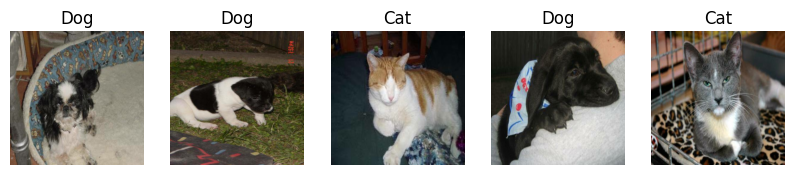

In [7]:
print("\n--- Dataset Training ---")
check_image_dimensions(train_datagen)


--- Dataset Testing ---

Ukuran Gambar Pertama: (256, 256, 3)
Tipe Data: <dtype: 'float32'>


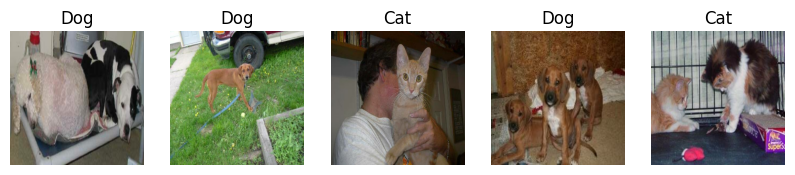

In [8]:
print("\n--- Dataset Testing ---")
check_image_dimensions(test_datagen)

In [9]:
def preprocessing_image(img):
    img = tf.keras.preprocessing.image.smart_resize(img, (150,150))
    img = img / 255.0
    return img

In [10]:
model = Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = [150,150,3]),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          33,858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,946 (152.13 KB)

 Trainable params: 38,946 (152.13 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = tf.keras.losses.CategoricalCrossentropy(), 
             metrics = ['accuracy', 'precision'])

In [12]:
data_train = train_datagen.map(lambda x, y: (preprocessing_image(x), y))
data_test = test_datagen.map(lambda x, y: (preprocessing_image(x), y))

In [13]:
history = model.fit(data_train, validation_data = data_test, verbose = 2, epochs = 10)
#model.fit(data_train, validation_data = data_test, verbose = 2, epochs = 10)

Epoch 1/10
740/740 - 175s - 237ms/step - accuracy: 0.6775 - loss: 0.5996 - precision: 0.6775 - val_accuracy: 0.6451 - val_loss: 0.6770 - val_precision: 0.6451
Epoch 2/10
740/740 - 164s - 221ms/step - accuracy: 0.7580 - loss: 0.5022 - precision: 0.7580 - val_accuracy: 0.7761 - val_loss: 0.4820 - val_precision: 0.7761
Epoch 3/10
740/740 - 123s - 166ms/step - accuracy: 0.7889 - loss: 0.4531 - precision: 0.7889 - val_accuracy: 0.7160 - val_loss: 0.5824 - val_precision: 0.7160
Epoch 4/10
740/740 - 125s - 169ms/step - accuracy: 0.8147 - loss: 0.4179 - precision: 0.8147 - val_accuracy: 0.8227 - val_loss: 0.3998 - val_precision: 0.8227
Epoch 5/10
740/740 - 155s - 209ms/step - accuracy: 0.8276 - loss: 0.3917 - precision: 0.8276 - val_accuracy: 0.7859 - val_loss: 0.4676 - val_precision: 0.7859
Epoch 6/10
740/740 - 145s - 196ms/step - accuracy: 0.8392 - loss: 0.3667 - precision: 0.8392 - val_accuracy: 0.8077 - val_loss: 0.4440 - val_precision: 0.8077
Epoch 7/10
740/740 - 186s - 251ms/step - accur

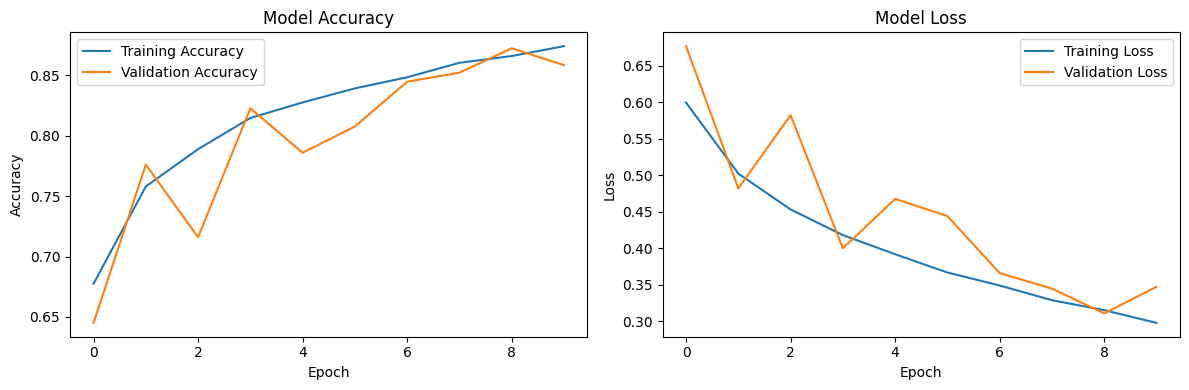

In [14]:
# Pastikan menggunakan .history
plt.figure(figsize=(12,4))

# Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()